<a href="https://colab.research.google.com/github/haehn/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

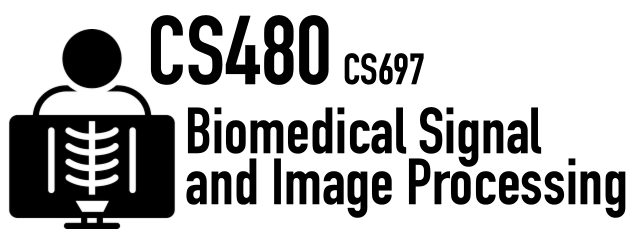
# Assignment 1


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [3]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

In [4]:
ecg

array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])

In [29]:
print(ecg[0])
print(ecg[1])

-0.245
-0.215


In [34]:
ecg[0:10] # first ten values in ecg (indexing)

array([-0.245, -0.215, -0.185, -0.175, -0.17 , -0.17 , -0.185, -0.17 ,
       -0.16 , -0.15 ])

In [35]:
ecg[0:10:2] # first ten values in ecg but only every second (indexing + slicing)

array([-0.245, -0.185, -0.17 , -0.185, -0.16 ])

In [41]:
first_second = ecg[0:360] # first second since we have 360 samples per second
second_second = ecg[360:720] # this is just the 2nd second
third_second = ecg[720:1080] # this is third second

In [42]:
first_second = ecg[0:360*1] # first second since we have 360 samples per second
second_second = ecg[360*1:360*2] # this is just the 2nd second
third_second = ecg[360*2:360*3] # this is third second

In [43]:
first_second = ecg[0:SAMPLING_RATE*1] # first second since we have 360 samples per second
second_second = ecg[SAMPLING_RATE*1:SAMPLING_RATE*2] # this is just the 2nd second
third_second = ecg[SAMPLING_RATE*2:SAMPLING_RATE*3] # this is third second

In [46]:
from9to11seconds = ecg[8*SAMPLING_RATE:10*SAMPLING_RATE] # 0,1,2,3,4,5,6,7,[8],9,[10] are 9 to 11 seconds

In [47]:
from10to12seconds = ecg[9*SAMPLING_RATE:11*SAMPLING_RATE] # this is really 10 to 12 seconds

In [51]:
from12to15seconds = ecg[11*SAMPLING_RATE:14*SAMPLING_RATE]

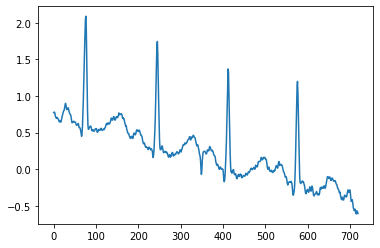

In [49]:
plt.plot(from9to11seconds)

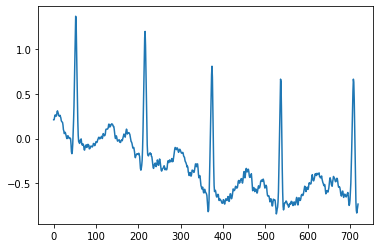

In [50]:
plt.plot(from10to12seconds)

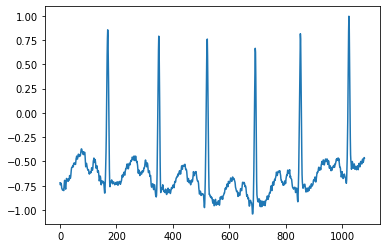

In [52]:
plt.plot(from12to15seconds)

In [10]:
a = [1,2,'3asastring']

In [11]:
a

[1, 2, '3asastring']

In [19]:
a = np.array([1,2,3], dtype=np.uint8)

In [24]:
a # 3bytes

array([1, 2, 3], dtype=uint8)

In [25]:
a.nbytes

3

In [21]:
b = np.array([1,2,3])

In [22]:
b

array([1, 2, 3])

In [23]:
b.dtype

dtype('int64')

In [26]:
b.nbytes

24

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


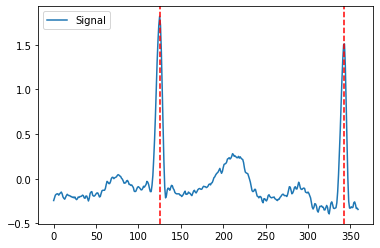

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [ ]:
# TODO Does the detection work well?

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# TODO Does the filtering improve the result?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#